# Fake News vs Real News
---

> <strong>Notícias falsas</strong> (sendo também muito comum o uso do termo em inglês <strong>fake news</strong>) são uma forma de imprensa marrom que consiste na distribuição deliberada de desinformação ou boatos via jornal impresso, televisão, rádio, ou ainda online, como nas mídias sociais.

<p>Fake news sempre foram um problemas, porém em 2016 com a eleição presidencial dos EUA acabaram ganhando uma notoriedade maior e
devido ao crescimento de redes sociais e maior facilidade de passar informação, o problema continua crescendo.</p>

## O desafio

<p>Encontrar um jeito eficiente de diferenciar as noticias falsas das noticias verdadeiras, de um modo automático e sem muita intervenção humana</p>

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk as nlp
import string
%matplotlib inline

In [3]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

## Análise exploratória 

In [11]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [69]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 5 columns):
title      5001 non-null object
text       5001 non-null object
subject    5001 non-null object
date       5001 non-null object
target     5001 non-null object
dtypes: object(5)
memory usage: 195.5+ KB


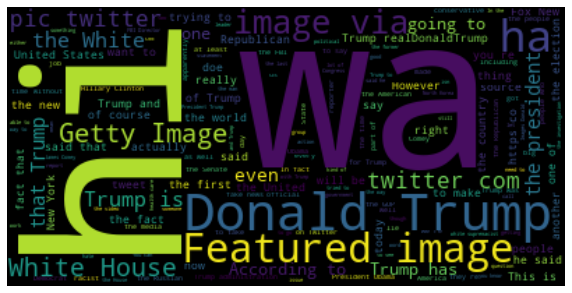

In [36]:
from wordcloud import WordCloud, ImageColorGenerator

# Junta todas as mensagens do dataFrame fake:
text = " ".join(review for review in df_fake.text[0:2000])

# Gera a nuvem de palavras:
wordcloud = WordCloud().generate(text)

# Aumenta o tamanho e mostra a nuvem:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

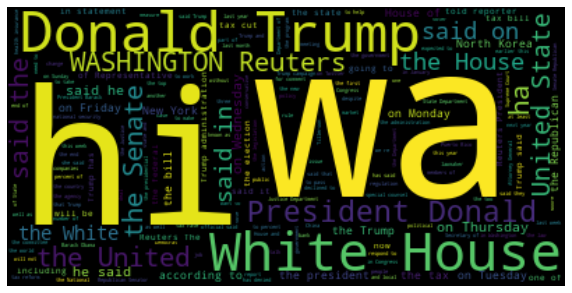

In [35]:
from wordcloud import WordCloud, ImageColorGenerator

# Junta todas as mensagens do dataFrame true:
text = " ".join(review for review in df_true.text[0:2000])

# Gera a nuvem de palavras:
wordcloud = WordCloud().generate(text)

# Aumenta o tamanho e mostra a nuvem:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
from nltk.corpus import stopwords
def clean_text(text):
    # Retirar pontuações
    nopunc = [char for char in text if char not in string.punctuation]
    
    # Juntar novamente
    nopunc = "".join(nopunc)
    
    # Remover stopwords e retornar texto em lower case
    msg = [word for word in nopunc.split() if word not in stopwords.words("english")]
    
    return msg

In [27]:
df_true["text"].head(1000)

0      [washington, reuters, the, head, conservative,...
1      [washington, reuters, transgender, people, all...
2      [washington, reuters, the, special, counsel, i...
3      [washington, reuters, trump, campaign, adviser...
4      [seattlewashington, reuters, president, donald...
                             ...                        
995    [washington, reuters, a, us, congressional, co...
996    [washington, reuters, us, president, donald, t...
997    [washington, reuters, us, secretary, state, re...
998    [washington, reuters, former, cia, director, j...
999    [seoul, reuters, us, defense, secretary, jim, ...
Name: text, Length: 1000, dtype: object

In [28]:
df_fake['target'] = 'fake'
df_true['target'] = 'true'
df_fake = df_fake[0:5001]
df_true = df_true[0:5001]
news = pd.concat([df_fake, df_true]).reset_index(drop = True)
news.tail()

,title,text,subject,date,target
9997,Trump aides attack agency that will analyze he...,WASHINGTON (Reuters) - Aides to U.S. President...,politicsNews,"March 12, 2017",true
9998,Highlights: The Trump presidency on March 12 a...,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"March 12, 2017",true
9999,Obama lawyers move fast to join fight against ...,WASHINGTON (Reuters) - When Johnathan Smith re...,politicsNews,"March 13, 2017",true
10000,Mike Pence to tour Asia next month amid securi...,JAKARTA (Reuters) - U.S. Vice President Mike P...,politicsNews,"March 13, 2017",true
10001,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,"March 13, 2017",true


In [17]:
news["length"] = news["text"].apply(len)
news.head()

,title,text,subject,date,target,length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,2346


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
bow_transformer = CountVectorizer(analyzer=clean_text).fit(news["text"])

In [33]:
print(len(bow_transformer.vocabulary_))

102545


In [35]:
text_bow = bow_transformer.transform(news["text"])

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
tdidf_transformer = TfidfTransformer()

In [39]:
tdidf_transformer = tdidf_transformer.fit(text_bow)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
text_tfidf = tdidf_transformer.transform(text_bow)
#fake_detect_model = MultinomialNB().fit(text_test, news["subject"])

In [43]:
from sklearn.model_selection import train_test_split

In [64]:
text_train, text_test, subject_train, subject_test = train_test_split(news["text"], news["subject"], test_size=0.3)

In [58]:
from sklearn.pipeline import Pipeline

In [65]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=clean_text)),
    ("tfidf", TfidfTransformer()),
    ("classifier", MultinomialNB())
])

In [66]:
pipeline.fit(text_train, subject_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x000002F18349D8B8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [67]:
pred = pipeline.predict(text_test)

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [72]:
print(classification_report(pred, subject_test)) 

              precision    recall  f1-score   support

        News       0.97      0.99      0.98      1488
politicsNews       0.99      0.97      0.98      1513

    accuracy                           0.98      3001
   macro avg       0.98      0.98      0.98      3001
weighted avg       0.98      0.98      0.98      3001



In [73]:
print(confusion_matrix(pred, subject_test)) 

[[1473   15]
 [  45 1468]]
